In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

import matplotlib
matplotlib.rcParams['text.usetex'] = True

image_path = ".//images//"

# Reference Triangle Element

In [2]:
local_coords = sp.Matrix([
    [0, 0],
    [1, 0],
    [0, 1]
])
n_nodes = local_coords.shape[0]

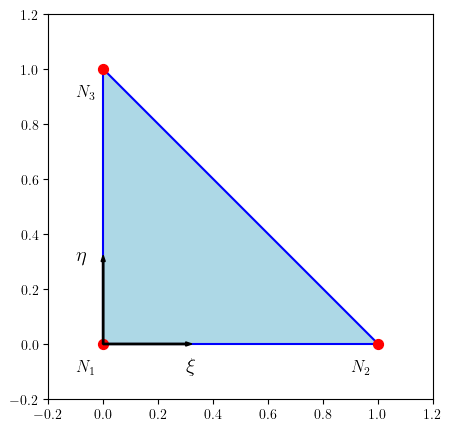

In [3]:
ref_tri_fig = plt.figure(figsize=(8, 5), facecolor="white")
ref_tri_axes = ref_tri_fig.add_subplot(1, 1, 1)

ref_tri_axes.set_aspect("equal")
ref_tri_axes.set_xlim(-0.2, 1.2)
ref_tri_axes.set_ylim(-0.2, 1.2)

for i_node in range(n_nodes):
    ref_tri_axes.scatter(
        local_coords[i_node, 0],
        local_coords[i_node, 1],
        color="red",
        s=50,
        zorder=10
    )
    ref_tri_axes.text(
        local_coords[i_node, 0] - 0.1,
        local_coords[i_node, 1] - 0.1,
        "$N_{}$".format(i_node + 1),
        fontsize=12
    )
    i_node_next = (i_node + 1) % n_nodes
    ref_tri_axes.plot(
        [local_coords[i_node, 0], local_coords[i_node_next, 0]],
        [local_coords[i_node, 1], local_coords[i_node_next, 1]],
        color="blue"
    )
    pass

ref_tri_axes.fill(
    local_coords[:, 0],
    local_coords[:, 1],
    color="lightblue",
    zorder=0
)

ref_tri_axes.arrow(
    0, 0, 0.3, 0,
    width=0.005,
    color="black",
    zorder=20
)
ref_tri_axes.text(
    0.3, -0.1,
    r"$\xi$",
    fontsize=15
)
ref_tri_axes.arrow(
    0, 0, 0, 0.3,
    width=0.005,
    color="black",
    zorder=20
)
ref_tri_axes.text(
    -0.1, 0.3,
    r"$\eta$",
    fontsize=15
)

ref_tri_fig.savefig(os.path.join(image_path, "ref_tri_elem.png"), bbox_inches="tight" )

ref_tri_fig.show()

# Transformation

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_1 + A_2\xi + A_3\eta\\
B_1 + B_2\xi + B_3\eta
\end{bmatrix}
$$

Also can be written as:

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_2 & A_3\\
B_2 & B_3
\end{bmatrix}
\begin{bmatrix}
\xi\\ \eta
\end{bmatrix}+
\begin{bmatrix}
A_1\\ B_1
\end{bmatrix}
$$

Thus:

$$
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}=
\begin{bmatrix}
1 & \xi_1 & \eta_1\\
1 & \xi_2 & \eta_2\\
1 & \xi_3 & \eta_3
\end{bmatrix}
\begin{bmatrix}
A_1\\ A_2\\ A_3
\end{bmatrix}
$$

In [4]:
x_1, y_1 = sp.symbols("x_1, y_1")
x_2, y_2 = sp.symbols("x_2, y_2")
x_3, y_3 = sp.symbols("x_3, y_3")
xi, eta = sp.symbols("xi, eta")

In [5]:
coeff_to_node = sp.zeros(n_nodes, n_nodes)
for i_node in range(n_nodes):
    coeff_to_node[i_node, :] = sp.Matrix([
        [1, local_coords[i_node, 0], local_coords[i_node, 1]]
    ])
    pass
coeff_to_node

Matrix([
[1, 0, 0],
[1, 1, 0],
[1, 0, 1]])

In [6]:
node_to_coeff = coeff_to_node.inv()
node_to_coeff

Matrix([
[ 1, 0, 0],
[-1, 1, 0],
[-1, 0, 1]])

In [7]:
A_0, A_1, A_2 = node_to_coeff @ sp.Matrix([x_1, x_2, x_3])
x = A_0 + A_1 * xi + A_2 * eta
x = sp.simplify(x)
x

-eta*(x_1 - x_3) + x_1 - xi*(x_1 - x_2)

In [8]:
B_0, B_1, B_2 = node_to_coeff @ sp.Matrix([y_1, y_2, y_3])
y = B_0 + B_1 * xi + B_2 * eta
y = sp.simplify(y)
y

-eta*(y_1 - y_3) - xi*(y_1 - y_2) + y_1

In [9]:
jacobian_matrix = sp.Matrix([x, y]).jacobian(sp.Matrix([xi, eta]))
jacobian_matrix = sp.simplify(jacobian_matrix)
jacobian_matrix

Matrix([
[-x_1 + x_2, -x_1 + x_3],
[-y_1 + y_2, -y_1 + y_3]])

In [10]:
jacobian_det = jacobian_matrix.det()
jacobian_det = sp.simplify(jacobian_det)
jacobian_det

x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2

In [11]:
# print(sp.latex(jacobian_matrix))
# print(sp.latex(jacobian_det))

Jacobi matrix:

$$
J=
\begin{bmatrix}
\frac{\partial x}{\partial \xi} & \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} & \frac{\partial y}{\partial \eta}
\end{bmatrix}=
\begin{bmatrix}
-x_1 + x_2 & -x_1 + x_3\\
-y_1 + y_2 & -y_1 + y_3
\end{bmatrix}
$$

it's obvious that the jacobi matrix is constant. Also the determinant of the jacobi matrix is constant:

$$
det(J)=x_{1} y_{2} - x_{1} y_{3} - x_{2} y_{1} + x_{2} y_{3} + x_{3} y_{1} - x_{3} y_{2}
$$

# Mass Matrix (order 2 as example)

In [12]:
order_2_nodes = sp.Matrix([
    [0, 0],
    [1, 0],
    [0, 1],
    [sp.Rational(1, 2), 0],
    [sp.Rational(1, 2), sp.Rational(1, 2)],
    [0, sp.Rational(1, 2)]
])
order_2_n_nodes = order_2_nodes.shape[0]
order_2_nodes

Matrix([
[  0,   0],
[  1,   0],
[  0,   1],
[1/2,   0],
[1/2, 1/2],
[  0, 1/2]])

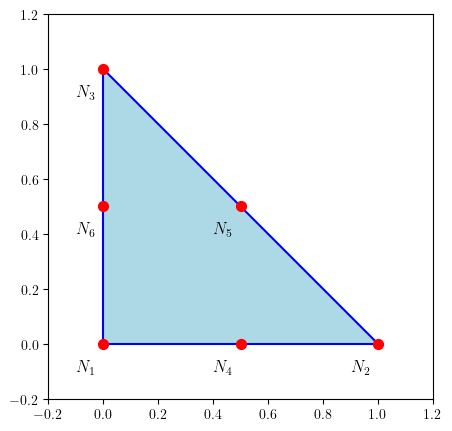

In [13]:
order_2_tri_fig = plt.figure(figsize=(8, 5), facecolor="white")
order_2_tri_axes = order_2_tri_fig.add_subplot(1, 1, 1)

order_2_tri_axes.set_aspect("equal")
order_2_tri_axes.set_xlim(-0.2, 1.2)
order_2_tri_axes.set_ylim(-0.2, 1.2)

for i_node in range(order_2_nodes.shape[0]):
    order_2_tri_axes.scatter(
        order_2_nodes[i_node, 0],
        order_2_nodes[i_node, 1],
        color="red",
        s=50,
        zorder=10
    )
    order_2_tri_axes.text(
        order_2_nodes[i_node, 0] - 0.1,
        order_2_nodes[i_node, 1] - 0.1,
        "$N_{}$".format(i_node + 1),
        fontsize=12
    )
    pass

for i_node in range(n_nodes):
    i_node_next = (i_node + 1) % n_nodes
    order_2_tri_axes.plot(
        [local_coords[i_node, 0], local_coords[i_node_next, 0]],
        [local_coords[i_node, 1], local_coords[i_node_next, 1]],
        color="blue"
    )
    pass

order_2_tri_axes.fill(
    local_coords[:, 0],
    local_coords[:, 1],
    color="lightblue",
    zorder=0
)

order_2_tri_fig.savefig(os.path.join(image_path, "order_2_tri_elem.png"), bbox_inches="tight" )

order_2_tri_fig.show()

## Base Functions

The base functions are:

$$
\tilde{u}(\xi, \eta) =
a_0 + a_1 \xi + a_2 \eta + a_3 \xi^2 + a_4 \xi \eta + a_5 \eta^2
$$

The coefficients are ensured by the following conditions:

$$
u_j = \tilde{u}(\xi_j, \eta_j)\quad j = 1, 2, 3
$$

In [14]:
order_2_base_functions = sp.Matrix([
    [1, xi, eta, xi**2, xi * eta, eta**2]
])
order_2_base_functions

Matrix([[1, xi, eta, xi**2, eta*xi, eta**2]])

In [15]:
order_2_coeff_to_scalar = sp.zeros(order_2_n_nodes, order_2_n_nodes)
for i_node in range(order_2_n_nodes):
    order_2_coeff_to_scalar[i_node, :] = order_2_base_functions.subs( \
        {xi: order_2_nodes[i_node, 0], eta: order_2_nodes[i_node, 1]} )
    pass
order_2_coeff_to_scalar

Matrix([
[1,   0,   0,   0,   0,   0],
[1,   1,   0,   1,   0,   0],
[1,   0,   1,   0,   0,   1],
[1, 1/2,   0, 1/4,   0,   0],
[1, 1/2, 1/2, 1/4, 1/4, 1/4],
[1,   0, 1/2,   0,   0, 1/4]])

In [16]:
# print(sp.latex(order_2_coeff_to_scalar))

which satisfies:

$$
\begin{bmatrix}
u_1\\ u_2\\ u_3\\ u_4\\ u_5\\ u_6
\end{bmatrix}=
\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 1 & 0 & 0\\1 & 0 & 1 & 0 & 0 & 1\\1 & \frac{1}{2} & 0 & \frac{1}{4} & 0 & 0\\1 & \frac{1}{2} & \frac{1}{2} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4}\\1 & 0 & \frac{1}{2} & 0 & 0 & \frac{1}{4}\end{bmatrix}
\begin{bmatrix}
a_0\\ a_1\\ a_2\\ a_3\\ a_4\\ a_5
\end{bmatrix}
$$

Thus $\tilde{u}(\xi, \eta)$ can be written as:

$$
\begin{aligned}
\tilde{u}(\xi, \eta)
&= \begin{bmatrix}1 & \xi & \eta & \xi^2 & \xi \eta & \eta^2\end{bmatrix}
\begin{bmatrix}
a_0\\ a_1\\ a_2\\ a_3\\ a_4\\ a_5
\end{bmatrix}\\
&=\begin{bmatrix}1 & \xi & \eta & \xi^2 & \xi \eta & \eta^2\end{bmatrix}
\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0\\1 & 1 & 0 & 1 & 0 & 0\\1 & 0 & 1 & 0 & 0 & 1\\1 & \frac{1}{2} & 0 & \frac{1}{4} & 0 & 0\\1 & \frac{1}{2} & \frac{1}{2} & \frac{1}{4} & \frac{1}{4} & \frac{1}{4}\\1 & 0 & \frac{1}{2} & 0 & 0 & \frac{1}{4}\end{bmatrix}^{-1}
\begin{bmatrix}
u_1\\ u_2\\ u_3\\ u_4\\ u_5\\ u_6
\end{bmatrix}\\
&=
\begin{bmatrix} \phi_1 & \phi_2 & \phi_3 & \phi_4 & \phi_5 & \phi_6\end{bmatrix}
\begin{bmatrix}
u_1\\ u_2\\ u_3\\ u_4\\ u_5\\ u_6
\end{bmatrix}
\end{aligned}
$$

## Shape Functions

In [17]:
order_2_shape_functions = order_2_base_functions @ order_2_coeff_to_scalar.inv()
order_2_shape_functions = sp.simplify(order_2_shape_functions).T
order_2_shape_functions

Matrix([
[2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1],
[                                   xi*(2*xi - 1)],
[                                 eta*(2*eta - 1)],
[                            4*xi*(-eta - xi + 1)],
[                                        4*eta*xi],
[                           4*eta*(-eta - xi + 1)]])

In [18]:
# print(sp.latex(order_2_shape_functions))

we get the shape functions $\phi_j(\xi,\eta)$ :

$$
\begin{bmatrix}
\phi_1 \\ \phi_2 \\ \phi_3 \\ \phi_4 \\ \phi_5 \\ \phi_6
\end{bmatrix}=
\begin{bmatrix}2 \eta^{2} + 4 \eta \xi - 3 \eta + 2 \xi^{2} - 3 \xi + 1\\\xi \left(2 \xi - 1\right)\\\eta \left(2 \eta - 1\right)\\4 \xi \left(- \eta - \xi + 1\right)\\4 \eta \xi\\4 \eta \left(- \eta - \xi + 1\right)\end{bmatrix}
$$

shape fucntion $\phi_j$ should be $1$ at $(\xi_j, \eta_j)$ and $0$ at $(\xi_k, \eta_k)$ where $k \neq j$. Let's do a check as below:

In [19]:
for i_node in range(order_2_n_nodes):
    print(order_2_shape_functions.subs({xi: order_2_nodes[i_node, 0], eta: order_2_nodes[i_node, 1]}))
    pass

Matrix([[1], [0], [0], [0], [0], [0]])
Matrix([[0], [1], [0], [0], [0], [0]])
Matrix([[0], [0], [1], [0], [0], [0]])
Matrix([[0], [0], [0], [1], [0], [0]])
Matrix([[0], [0], [0], [0], [1], [0]])
Matrix([[0], [0], [0], [0], [0], [1]])


## Mass Matrix

In discontinuous galerkin method, $\int_\Omega \phi_i(x,y)\phi_j(x,y)d\Omega$ is needed. While in reference triangle, the integral can be transfered to:

$$
\int_\Omega \phi_i(x,y)\phi_j(x,y)d\Omega=
\int_{\Omega} |J| \phi_i(\xi,\eta)\phi_j(\xi,\eta)d\xi d\eta
$$

For tri-element, $|J|$ is constant, thus only $\phi_i\phi_j$'s integral is needed as below.

In [20]:
order_2_mass_matrix_not_int = order_2_shape_functions @ order_2_shape_functions.T
order_2_mass_matrix_not_int = sp.simplify(order_2_mass_matrix_not_int)
order_2_mass_matrix_not_int

Matrix([
[                   (2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1)**2, xi*(2*xi - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1), eta*(2*eta - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1), -4*xi*(eta + xi - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1), 4*eta*xi*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1), -4*eta*(eta + xi - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1)],
[        xi*(2*xi - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1),                                              xi**2*(2*xi - 1)**2,                                      eta*xi*(2*eta - 1)*(2*xi - 1),                                      -4*xi**2*(2*xi - 1)*(eta + xi - 1),                                      4*eta*xi**2*(2*xi - 1),                                      -4*eta*xi*(2*xi - 1)*(eta + xi - 1)],
[      eta*(2*eta - 1)*(2*eta**2 + 4*eta*xi - 3*eta + 2*xi**2 - 3*xi + 1),                                    eta*xi*(2*eta - 1)*(2*xi - 1),               

In [21]:
order_2_mass_matrix_int = sp.integrate(order_2_mass_matrix_not_int, (xi, 0, 1 - eta), (eta, 0, 1))
order_2_mass_matrix_int

Matrix([
[  1/60, -1/360, -1/360,     0, -1/90,     0],
[-1/360,   1/60, -1/360,     0,     0, -1/90],
[-1/360, -1/360,   1/60, -1/90,     0,     0],
[     0,      0,  -1/90,  4/45,  2/45,  2/45],
[ -1/90,      0,      0,  2/45,  4/45,  2/45],
[     0,  -1/90,      0,  2/45,  2/45,  4/45]])

In [22]:
# transfer it to numpy array
order_2_mass_matrix_int_np = np.array(order_2_mass_matrix_int).astype(np.float64)
print(order_2_mass_matrix_int_np)

[[ 0.01666667 -0.00277778 -0.00277778  0.         -0.01111111  0.        ]
 [-0.00277778  0.01666667 -0.00277778  0.          0.         -0.01111111]
 [-0.00277778 -0.00277778  0.01666667 -0.01111111  0.          0.        ]
 [ 0.          0.         -0.01111111  0.08888889  0.04444444  0.04444444]
 [-0.01111111  0.          0.          0.04444444  0.08888889  0.04444444]
 [ 0.         -0.01111111  0.          0.04444444  0.04444444  0.08888889]]


In [23]:
print(sp.latex(order_2_mass_matrix_int))

\left[\begin{matrix}\frac{1}{60} & - \frac{1}{360} & - \frac{1}{360} & 0 & - \frac{1}{90} & 0\\- \frac{1}{360} & \frac{1}{60} & - \frac{1}{360} & 0 & 0 & - \frac{1}{90}\\- \frac{1}{360} & - \frac{1}{360} & \frac{1}{60} & - \frac{1}{90} & 0 & 0\\0 & 0 & - \frac{1}{90} & \frac{4}{45} & \frac{2}{45} & \frac{2}{45}\\- \frac{1}{90} & 0 & 0 & \frac{2}{45} & \frac{4}{45} & \frac{2}{45}\\0 & - \frac{1}{90} & 0 & \frac{2}{45} & \frac{2}{45} & \frac{4}{45}\end{matrix}\right]


# Volume Integral

Another part in discontinuous galerkin method is the volume integral $\int_\Omega\vec{f}(\phi_j u_j)\cdot\nabla\phi_i d\Omega$. In this part, we need $\nabla\phi_i$'s value at the Gauss points $(x_k,y_k)$ as well as $\phi_j(x,y)$'s value at the Gauss points.

## $\nabla \phi_i$'s value

$$
\nabla \phi_i = \frac{\partial \phi_i}{\partial x} \vec{e}_x + \frac{\partial \phi_i}{\partial y} \vec{e}_y
$$

For $\phi_{i,x}$ we use chain rule:

$$
\frac{\partial \phi_i}{\partial x} = \frac{\partial \phi_i}{\partial \xi} \frac{\partial \xi}{\partial x} + \frac{\partial \phi_i}{\partial \eta} \frac{\partial \eta}{\partial x}
$$

we first get $\frac{\partial\phi_i}{\partial \xi}$ and $\frac{\partial\phi_i}{\partial \eta}$:

In [24]:
order_2_shape_functions_local_nabla = order_2_shape_functions.jacobian(sp.Matrix([xi, eta]))
order_2_shape_functions_local_nabla = sp.simplify(order_2_shape_functions_local_nabla)
order_2_shape_functions_local_nabla

Matrix([
[ 4*eta + 4*xi - 3,  4*eta + 4*xi - 3],
[         4*xi - 1,                 0],
[                0,         4*eta - 1],
[-4*eta - 8*xi + 4,             -4*xi],
[            4*eta,              4*xi],
[           -4*eta, -8*eta - 4*xi + 4]])

Then we get $\frac{\partial \xi}{\partial x}$ and $\frac{\partial \eta}{\partial x}$:

In [25]:
jacobian_matrix.inv()

Matrix([
[(-y_1 + y_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),  (x_1 - x_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[ (y_1 - y_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2), (-x_1 + x_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)]])

In [26]:
x_new = sp.symbols("x_new")
y_new = sp.symbols("y_new")
xi_new = sp.symbols("xi_new")
eta_new = sp.symbols("eta_new")
eq1 = sp.Eq(x_new, x.subs({xi: xi_new, eta: eta_new}))
eq2 = sp.Eq(y_new, y.subs({xi: xi_new, eta: eta_new}))

In [27]:
res_new = sp.solve([eq1, eq2], [xi_new, eta_new])
xi_new = xi_new.subs(res_new)
eta_new = eta_new.subs(res_new)

In [28]:
xi_new

(-x_1*y_3 + x_1*y_new + x_3*y_1 - x_3*y_new - x_new*y_1 + x_new*y_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)

In [29]:
eta_new

(x_1*y_2 - x_1*y_new - x_2*y_1 + x_2*y_new + x_new*y_1 - x_new*y_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)

In [30]:
jacobian_matrix_new = sp.Matrix([xi_new, eta_new]).jacobian(sp.Matrix([x_new, y_new]))
jacobian_matrix_new = sp.simplify(jacobian_matrix_new)
jacobian_matrix_new

Matrix([
[(-y_1 + y_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),  (x_1 - x_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[ (y_1 - y_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2), (-x_1 + x_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)]])

In [31]:
jacobian_matrix_new - jacobian_matrix.inv()

Matrix([
[0, 0],
[0, 0]])

In [32]:
jacobian_matrix_inv = jacobian_matrix.inv()
jacobian_matrix_inv = sp.simplify(jacobian_matrix_inv)
jacobian_matrix_inv

Matrix([
[(-y_1 + y_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),  (x_1 - x_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[ (y_1 - y_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2), (-x_1 + x_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)]])

jacobian matrix:

$$
\frac{\partial (x,y)}{\partial (\xi,\eta)}=
\begin{bmatrix}
\frac{\partial x}{\partial \xi} & \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} & \frac{\partial y}{\partial \eta}
\end{bmatrix}=J
$$

here jacobian matrix's inverse is:

$$
\frac{\partial (\xi,\eta)}{\partial (x,y)}=
\begin{bmatrix}
\frac{\partial \xi}{\partial x} & \frac{\partial \xi}{\partial y}\\
\frac{\partial \eta}{\partial x} & \frac{\partial \eta}{\partial y}
\end{bmatrix}=J^{-1}
$$

thus we get $\nabla \phi_i$:

In [33]:
order_2_shape_functions_global_nabla = order_2_shape_functions_local_nabla @ jacobian_matrix_inv
order_2_shape_functions_global_nabla = sp.Matrix(order_2_shape_functions_global_nabla)
for i_node in range(order_2_n_nodes):
    for j_dir in range(2):
        order_2_shape_functions_global_nabla[i_node, j_dir] = sp.simplify(order_2_shape_functions_global_nabla[i_node, j_dir])
        pass
    pass
order_2_shape_functions_global_nabla

Matrix([
[                   (-y_2 + y_3)*(4*eta + 4*xi - 3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),                      (x_2 - x_3)*(4*eta + 4*xi - 3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[                           -(4*xi - 1)*(y_1 - y_3)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),                              (x_1 - x_3)*(4*xi - 1)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[                           (4*eta - 1)*(y_1 - y_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),                            -(4*eta - 1)*(x_1 - x_2)/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[4*(-xi*(y_1 - y_2) + (y_1 - y_3)*(eta + 2*xi - 1))/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2),   4*(xi*(x_1 - x_2) - (x_1 - x_3)*(eta + 2*xi - 1))/(x_1*y_2 - x_1*y_3 - x_2*y_1 + x_2*y_3 + x_3*y_1 - x_3*y_2)],
[             4*(-eta*(y_1 - y_3) + xi*(y_1 - y_2))/(x_1*y_2 - x_1*y_3 - x_2*y_1 + 

In [34]:
order_2_shape_functions_global_nabla_times_jacobian_det = order_2_shape_functions_global_nabla * jacobian_det

it's worth noting that $|J|\nabla \phi_i$ is shown below:

$$
\begin{bmatrix}\left(- y_{2} + y_{3}\right) \left(4 \eta + 4 \xi - 3\right) & \left(x_{2} - x_{3}\right) \left(4 \eta + 4 \xi - 3\right)\\- \left(4 \xi - 1\right) \left(y_{1} - y_{3}\right) & \left(x_{1} - x_{3}\right) \left(4 \xi - 1\right)\\\left(4 \eta - 1\right) \left(y_{1} - y_{2}\right) & - \left(4 \eta - 1\right) \left(x_{1} - x_{2}\right)\\- 4 \xi \left(y_{1} - y_{2}\right) + 4 \left(y_{1} - y_{3}\right) \left(\eta + 2 \xi - 1\right) & 4 \xi \left(x_{1} - x_{2}\right) - 4 \left(x_{1} - x_{3}\right) \left(\eta + 2 \xi - 1\right)\\- 4 \eta \left(y_{1} - y_{3}\right) + 4 \xi \left(y_{1} - y_{2}\right) & 4 \eta \left(x_{1} - x_{3}\right) - 4 \xi \left(x_{1} - x_{2}\right)\\4 \eta \left(y_{1} - y_{3}\right) - 4 \left(y_{1} - y_{2}\right) \left(2 \eta + \xi - 1\right) & - 4 \eta \left(x_{1} - x_{3}\right) + 4 \left(x_{1} - x_{2}\right) \left(2 \eta + \xi - 1\right)\end{bmatrix}
$$

In [35]:
# print(sp.latex(order_2_shape_functions_global_nabla * jacobian_det))

## Gauss Points and Weights

Gauss integral is often implied in numerical integration. For a reference triangle, the Gauss points and weights are shown in below figure:

![Gauss Points and Weights](.//images/tri_gauss_points_and_weights.png)

In [83]:
order_2_gauss_nodes = sp.Matrix([
    [sp.Rational(1, 6), sp.Rational(1, 6)],
    [sp.Rational(2, 3), sp.Rational(1, 6)],
    [sp.Rational(1, 6), sp.Rational(2, 3)]
])
order_2_gauss_weights = sp.Array([
    sp.Rational(1, 6),
    sp.Rational(1, 6),
    sp.Rational(1, 6)
])

In [84]:
order_2_gauss_nodes

Matrix([
[1/6, 1/6],
[2/3, 1/6],
[1/6, 2/3]])

In [85]:
order_2_gauss_weights

[1/6, 1/6, 1/6]

## $\phi$'s Value at Gauss Points

In [86]:
order_2_shape_functions_number = order_2_shape_functions.shape[0]
order_2_gauss_nodes_number = order_2_gauss_nodes.shape[0]
order_2_shape_functions_values_on_gauss_points = sp.zeros(order_2_shape_functions_number, order_2_gauss_nodes_number)
for j_shape_function in range(order_2_shape_functions_number):
    for i_gauss_node in range(order_2_gauss_nodes_number):
        order_2_shape_functions_values_on_gauss_points[j_shape_function, i_gauss_node] = \
            order_2_shape_functions[j_shape_function].subs({xi: order_2_gauss_nodes[i_gauss_node, 0], eta: order_2_gauss_nodes[i_gauss_node, 1]})
        pass
    pass
order_2_shape_functions_values_on_gauss_points = order_2_shape_functions_values_on_gauss_points.T
order_2_shape_functions_values_on_gauss_points

Matrix([
[ 2/9, -1/9, -1/9, 4/9, 1/9, 4/9],
[-1/9,  2/9, -1/9, 4/9, 4/9, 1/9],
[-1/9, -1/9,  2/9, 1/9, 4/9, 4/9]])

## $\nabla \phi$'s Value at Gauss Points

In [87]:
order_2_shape_functions_global_nabla_times_jacobian_det = sp.Array(order_2_shape_functions_global_nabla_times_jacobian_det)
order_2_shape_functions_global_nabla_times_jacobian_det

[[(-y_2 + y_3)*(4*eta + 4*xi - 3), (x_2 - x_3)*(4*eta + 4*xi - 3)], [-(4*xi - 1)*(y_1 - y_3), (x_1 - x_3)*(4*xi - 1)], [(4*eta - 1)*(y_1 - y_2), -(4*eta - 1)*(x_1 - x_2)], [-4*xi*(y_1 - y_2) + 4*(y_1 - y_3)*(eta + 2*xi - 1), 4*xi*(x_1 - x_2) - 4*(x_1 - x_3)*(eta + 2*xi - 1)], [-4*eta*(y_1 - y_3) + 4*xi*(y_1 - y_2), 4*eta*(x_1 - x_3) - 4*xi*(x_1 - x_2)], [4*eta*(y_1 - y_3) - 4*(y_1 - y_2)*(2*eta + xi - 1), -4*eta*(x_1 - x_3) + 4*(x_1 - x_2)*(2*eta + xi - 1)]]

In [88]:
order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes = []
for i_gauss_node in range(order_2_gauss_nodes_number):
    order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes.append(
        order_2_shape_functions_global_nabla_times_jacobian_det.subs({xi: order_2_gauss_nodes[i_gauss_node, 0], eta: order_2_gauss_nodes[i_gauss_node, 1]})
    )
    pass
order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes = sp.Array(order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes)
order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes.shape

(3, 6, 2)

In [89]:
order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes

[[[5*y_2/3 - 5*y_3/3, -5*x_2/3 + 5*x_3/3], [y_1/3 - y_3/3, -x_1/3 + x_3/3], [-y_1/3 + y_2/3, x_1/3 - x_2/3], [-8*y_1/3 + 2*y_2/3 + 2*y_3, 8*x_1/3 - 2*x_2/3 - 2*x_3], [-2*y_2/3 + 2*y_3/3, 2*x_2/3 - 2*x_3/3], [8*y_1/3 - 2*y_2 - 2*y_3/3, -8*x_1/3 + 2*x_2 + 2*x_3/3]], [[-y_2/3 + y_3/3, x_2/3 - x_3/3], [-5*y_1/3 + 5*y_3/3, 5*x_1/3 - 5*x_3/3], [-y_1/3 + y_2/3, x_1/3 - x_2/3], [-2*y_1/3 + 8*y_2/3 - 2*y_3, 2*x_1/3 - 8*x_2/3 + 2*x_3], [2*y_1 - 8*y_2/3 + 2*y_3/3, -2*x_1 + 8*x_2/3 - 2*x_3/3], [2*y_1/3 - 2*y_3/3, -2*x_1/3 + 2*x_3/3]], [[-y_2/3 + y_3/3, x_2/3 - x_3/3], [y_1/3 - y_3/3, -x_1/3 + x_3/3], [5*y_1/3 - 5*y_2/3, -5*x_1/3 + 5*x_2/3], [-2*y_1/3 + 2*y_2/3, 2*x_1/3 - 2*x_2/3], [-2*y_1 - 2*y_2/3 + 8*y_3/3, 2*x_1 + 2*x_2/3 - 8*x_3/3], [2*y_1/3 + 2*y_2 - 8*y_3/3, -2*x_1/3 - 2*x_2 + 8*x_3/3]]]

In [95]:
order_2_gauss_weights[0] * order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes[0]

[[5*y_2/18 - 5*y_3/18, -5*x_2/18 + 5*x_3/18], [y_1/18 - y_3/18, -x_1/18 + x_3/18], [-y_1/18 + y_2/18, x_1/18 - x_2/18], [-4*y_1/9 + y_2/9 + y_3/3, 4*x_1/9 - x_2/9 - x_3/3], [-y_2/9 + y_3/9, x_2/9 - x_3/9], [4*y_1/9 - y_2/3 - y_3/9, -4*x_1/9 + x_2/3 + x_3/9]]

In [92]:
a = sp.tensorproduct(order_2_gauss_weights, order_2_shape_functions_global_nabla_times_jacobian_det_values_on_gauss_nodes)
a.shape

(3, 3, 6, 2)

In [93]:
sp.tensorcontraction(a, (0, 1))

[[y_2/6 - y_3/6, -x_2/6 + x_3/6], [-y_1/6 + y_3/6, x_1/6 - x_3/6], [y_1/6 - y_2/6, -x_1/6 + x_2/6], [-2*y_1/3 + 2*y_2/3, 2*x_1/3 - 2*x_2/3], [-2*y_2/3 + 2*y_3/3, 2*x_2/3 - 2*x_3/3], [2*y_1/3 - 2*y_3/3, -2*x_1/3 + 2*x_3/3]]